
## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

![Equator](equatorsign.png)

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* You may have to install the [citipy Python library](https://pypi.python.org/pypi/citipy). You can do this from Git Bash (or the Anaconda terminal) by typing the command `pip install citipy`

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

## Copyright

Coding Boot Camp (C) 2016. All Rights Reserved.


## Observations

1. Temperature is affected by City Latitude, the closer a city is to the equator, the hotter the city ends to be.
2. Humidity seems to be completely independent of latitude, there are high humidity cities throughout the latitudatal range. There are also low humidity cities throughout the laititudal range. It does not seem to have any affect.
3. Wind Speed seems to be slightly affected by latitudal range. Cities towards the boundaries of the range seem to see higher wind speeds. These high winds are not overly common and tend to be small in number compared to low wind speed cities. However, when comparing to cities near the equater, there are more high wind cities on the outskirts.

NOTE: I could probably (read: should) have written a while loop to ensure that my cities list always had at least 500 cities, but while loops are scary and should be avoided, so I'm just hoping that 3000 pulls returns enough unique cities, but it might not -- depends on the randoms.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import numpy as np
import openweathermapy.core as owm
from config import api_key
from pprint import pprint
import random

In [2]:
lats = np.arange(-60,80,0.00001)
longs = np.arange(-180,180,0.00001)

In [3]:
random_lats = random.sample(list(lats),3000) ## Create random lats and longs to draw cities
random_longs = random.sample(list(longs),3000)
randoms = pd.DataFrame(random_lats,random_longs)
#randoms.columns=["Latitude","Longitude"]
randoms = randoms.reset_index()
randoms = randoms.applymap(float)

In [4]:
cities  = []
countries = []
randoms = randoms.rename(columns={"index":"Latitudes",0:"Longitudes"})
## FOR LOOP to draw city names from lat and long values
for index, row in randoms.iterrows():
    lat = row["Latitudes"]
    lon = row["Longitudes"]
    city = citipy.nearest_city(lat,lon)
    if index %2500 == 0:
        print(f"Working on city {index}")
    city_name = city.city_name
    #if city_name not in cities:
    cities.append(city_name)
    country_code = city.country_code
    countries.append(country_code)
len(cities)

Working on city 0
Working on city 2500


3000

In [5]:
settings = {"units": "imperial", "appid": api_key}
weather = []
temps = []
humids = []
clouds = []
winds = []
cities_lats = []
cities_longs = []
## foor loop to access and store weather data about selected cities
for city in cities:
    try:
        city_weather = owm.get_current(city, **settings)
        city_id = city_weather["weather"][0]["id"]
        pprint(f"Retriving current weather object for {city}:")
        pprint("==============")
        temp = city_weather["main"]["temp"]
        temps.append(temp)
        humid = city_weather["main"]["humidity"]
        humids.append(humid)
        cloud = city_weather["clouds"]["all"]
        clouds.append(cloud)
        wind = city_weather["wind"]["speed"]
        winds.append(wind)
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        cities_lats.append(city_lat)
        cities_longs.append(city_lon)
    except Exception as e:
        #pass
        print("Error, city skipped")
print(temps)
print(humids)
print(clouds)
print(winds)


'Retriving current weather object for quatre cocos:'
'=============='
'Retriving current weather object for bandarbeyla:'
'=============='
'Retriving current weather object for longyearbyen:'
'=============='
'Retriving current weather object for mincivan:'
'=============='
'Retriving current weather object for ushuaia:'
'=============='
'Retriving current weather object for longyearbyen:'
'=============='
'Retriving current weather object for ushuaia:'
'=============='
Error, city skipped
Error, city skipped
'Retriving current weather object for mahebourg:'
'=============='
'Retriving current weather object for longyearbyen:'
'=============='
'Retriving current weather object for longyearbyen:'
'=============='
'Retriving current weather object for ushuaia:'
'=============='
'Retriving current weather object for ushuaia:'
'=============='
'Retriving current weather object for ushuaia:'
'=============='
'Retriving current weather object for port alfred:'
'=============='
'Retriving cur

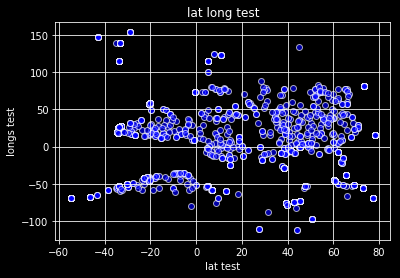

In [7]:
## Create scatter plots for appropraite variable comparisons
plt.scatter(cities_lats,cities_longs,
           alpha = 0.65,
           edgecolor = "white",
           color = "blue")
plt.style.use("dark_background")
plt.title("lat long test")
plt.xlabel("lat test")
plt.ylabel("longs test")
plt.grid()
plt.show()

In [48]:
len(randoms)

1000

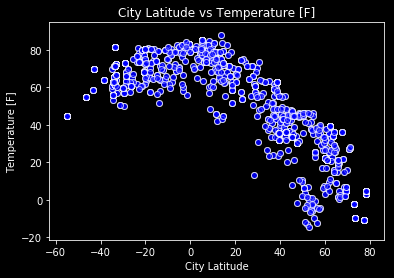

In [11]:
a = 0.65
ec = "white"
plt.scatter(cities_lats, temps,
            alpha = a,
            edgecolor = ec,
            color = "blue"
           )
plt.style.use("dark_background")
plt.title("City Latitude vs Temperature [F]")
plt.xlabel("City Latitude")
plt.ylabel("Temperature [F]")
plt.grid()
plt.savefig("TempVsLat.png")
#plt.legend(title = "City Type")
#plt.xlim(0,40)
plt.show()

In [9]:
len(cities_lats)

2465

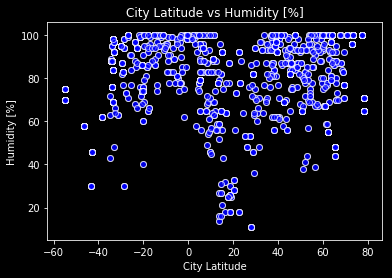

In [13]:
plt.scatter(cities_lats, humids,
            alpha = a,
            edgecolor = ec,
            color = "blue"
           )
plt.style.use("dark_background")
plt.title("City Latitude vs Humidity [%]")
plt.xlabel("City Latitude")
plt.ylabel("Humidity [%]")
plt.grid()
#plt.legend(title = "City Type")
#plt.xlim(0,40)
plt.savefig("HumVsLat.png")
plt.show()

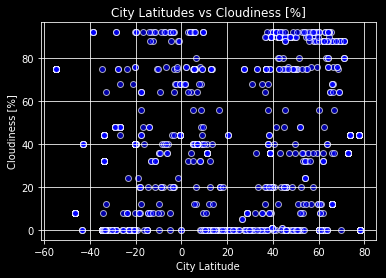

In [14]:
plt.scatter(cities_lats, clouds,
            alpha = a,
            edgecolor = ec,
            color = "blue"
           )
plt.style.use("dark_background")
plt.title("City Latitudes vs Cloudiness [%]")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness [%]")
plt.grid()
plt.savefig("CloudsVsLat.png")
#plt.legend(title = "City Type")
#plt.xlim(0,40)
plt.show()

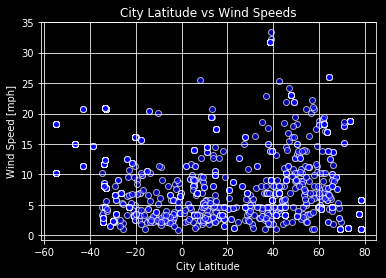

In [15]:
plt.scatter(cities_lats, winds,
            alpha = a,
            edgecolor = ec,
            color = "blue"
           )
plt.style.use("dark_background")
plt.title("City Latitude vs Wind Speeds")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed [mph]")
plt.grid()
plt.savefig("WindsVsLat.png")
#plt.legend(title = "City Type")
#plt.xlim(0,40)
plt.show()